In [1]:
import os
import pandas as pd
import yaml
import pickle, joblib
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
home = os.environ['HOME']
tutorial_dir = os.getcwd()
amw_dir = os.path.join(home, 'AMW25')
data_dir = os.path.join(amw_dir, 'data')
scaler = joblib.load(f'{data_dir}/scaler.pkl')

In [9]:
def plot_parity(y_true, y_pred, filename):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6,12))
    labels = ['Seebeck', 'Conductivity (electronic)', 'Conductivity (ionic)']
    cols = ['seebeck', 'cond_elec', 'cond_therm']
    plt.suptitle(filename)
    for i, ax in enumerate(axes):
        ax.scatter(y_true[cols[i]], y_pred.T[i])
        lim = [min(y_true[cols[i]].min(), y_pred.T[i].min()), max(y_true[cols[i]].max(), y_pred.T[i].max())]
        ax.plot(lim, lim, 'k--', lw=2)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.set_xlabel(f"True {labels[i]}")
        ax.set_ylabel(f"Predicted {labels[i]}")
    plt.tight_layout()
    plt.savefig(f'{filename}.png')

In [3]:
X_train_mat = pd.read_csv(f'{data_dir}/X_train_mat.csv')
X_train_tot = pd.read_csv(f'{data_dir}/X_train.csv')
y_train = pd.read_csv(f'{data_dir}/unscaled/y_train.csv').drop(columns=['index'])
y_test = pd.read_csv(f'{data_dir}/unscaled/y_test.csv').drop(columns=['index'])
X_val_mat = pd.read_csv(f'{data_dir}/X_eval_mat.csv')
X_val_tot = pd.read_csv(f'{data_dir}/X_eval.csv')
y_val = pd.read_csv(f'{data_dir}/unscaled/y_eval.csv').drop(columns=['index'])
X_test_tot = pd.read_csv(f'{data_dir}/X_test.csv')
X_test_mat = pd.read_csv(f'{data_dir}/X_test_mat.csv')
config_dir = f'{tutorial_dir}/config.yaml'
with open(config_dir, 'r') as file:
    config = yaml.safe_load(file)

targets = config['data']['target']
syms = config['data']['sym']

y_train_scaled = scaler.fit_transform(y_train).T
y_test_scaled = scaler.transform(y_test).T
y_val_scaled = scaler.transform(y_val).T

dat = {
    'X_train_tot': X_train_tot.copy(),
    'X_eval_tot': X_val_tot.copy(),
    'X_test_tot': X_test_tot.copy(),
    'y_train': y_train.copy(),
    'y_eval': y_val.copy(),
    'y_test': y_test.copy(),
    'X_train_mat': X_train_mat.copy(),
    'X_eval_mat': X_val_mat.copy(),
    'X_test_mat': X_test_mat.copy(),
    'y_train_scaled': y_train_scaled.copy(),
    'y_eval_scaled': y_val_scaled.copy(),
    'y_test_scaled': y_test_scaled.copy(),
}

with open(f'{tutorial_dir}/DataToLoad.pkl', 'wb') as f:
    pickle.dump(dat, f)




In [42]:
with open(f'{tutorial_dir}/DataToLoad.pkl', 'rb') as f:
        data = pickle.load(f)

In [43]:
drop_columns = data['X_train_mat'].columns.to_list()
drop_columns

['n_rot',
 'n_inv',
 'n_rotoinv',
 'n_mirror',
 'n_rot_screw',
 '1/2tran_screw',
 '1/3tran_screw',
 '3/4tran_screw',
 '1/4tran_screw',
 '1/6tran_screw',
 'n_glide',
 '1/2tran_glide',
 '3/4tran_glide',
 '1/4tran_glide',
 'n_tr']

In [45]:
data['X_train_tot'].drop(columns=drop_columns)

,MagpieData minimum Number,MagpieData maximum Number,MagpieData mean Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData mean AtomicWeight,MagpieData mode AtomicWeight,MagpieData mean MeltingT,MagpieData mode MeltingT,...,transition metal fraction,band center,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,32,82,46.050000,34,84.550000,89,110.940000,78.9600,738.138250,494.00,...,0.000000,4.966409,2.000000,3.000000,10.000000,3.150000,0.110193,0.165289,0.550964,0.173554
1,34,83,47.236000,34,87.816000,89,113.558064,78.9600,577.820800,494.00,...,0.000000,5.322104,2.000000,3.636000,10.000000,2.800000,0.108483,0.197223,0.542417,0.151877
2,30,56,45.300043,50,67.704105,80,107.058768,118.7100,519.069113,505.08,...,0.000000,3.623697,2.000000,1.409024,8.516914,0.000000,0.167702,0.118148,0.714150,0.000000
3,30,63,51.600000,51,57.800000,25,122.565600,121.7600,938.048000,903.78,...,0.000000,4.028547,2.000000,1.200000,6.000000,2.800000,0.166667,0.100000,0.500000,0.233333
4,34,52,45.666667,47,73.166667,65,106.338800,107.8682,1026.063333,1234.93,...,0.666667,4.820935,1.333333,1.333333,10.000000,0.000000,0.105263,0.105263,0.789474,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,12,51,31.190476,12,74.952381,68,71.453413,24.3050,867.846667,903.78,...,0.000000,4.386513,2.000000,1.190476,6.031746,0.000000,0.216867,0.129088,0.654045,0.000000
188,29,47,36.455782,29,72.823129,64,82.959901,63.5460,1024.695306,494.00,...,0.659864,4.900779,1.340136,1.360544,10.000000,0.000000,0.105517,0.107124,0.787359,0.000000
189,12,83,29.960552,12,74.840237,68,69.811701,24.3050,879.379882,923.00,...,0.000000,4.151146,2.000000,1.195266,3.944773,1.214990,0.239377,0.143059,0.472144,0.145420
190,7,24,15.587940,24,65.643216,49,33.186973,51.9961,1126.470854,2180.00,...,0.502513,5.208863,1.497487,1.537688,2.512563,0.000000,0.269928,0.277174,0.452899,0.000000


In [52]:
X_train = data['X_train_tot'].drop(columns=drop_columns)
X_test = data['X_test_tot'].drop(columns=drop_columns)
X_eval = data['X_eval_tot'].drop(columns=drop_columns)
y_train = data['y_train']
y_test = data['y_test']
y_eval = data['y_eval']

In [53]:
import math

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def scorer(y_test, y_pred):
    mae_s = math.log(mean_absolute_error(y_test['seebeck'], y_pred.T[0]))
    mae_o = math.log10(mean_absolute_error(y_test['cond_elec'], y_pred.T[1]))
    mae_k = mean_absolute_error(y_test['cond_therm'], y_pred.T[2])

    mae = (mae_s + mae_o + mae_k) / 3
    return mae

def mape_scorer(y_test, y_pred):
    mape_s = mape(y_test['seebeck'], y_pred.T[0])
    mape_o = mape(y_test['cond_elec'], y_pred.T[1])
    mape_k = mape(y_test['cond_therm'], y_pred.T[2])

    mape_ = (mape_s + mape_o + mape_k) / 3
    return mape_

def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 400, 3000, step=100) 
    max_depth = trial.suggest_int("max_depth", 1, 15)
    learning_rate = trial.suggest_float("learning_rate", 0.02, 0.3, log=True)  
    reg_lambda = trial.suggest_float("reg_lambda", 0.3, 0.6) 
    reg_alpha = trial.suggest_float("reg_alpha", 0.3, 0.6)  
    gamma = trial.suggest_float("gamma", 0, 10)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 15)

    model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        gamma=gamma,
        min_child_weight=min_child_weight,
        early_stopping_rounds=200,
    )
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    y_pred = model.predict(X_test)

    accuracy = mape_scorer(y_test,y_pred)
    trial.set_user_attr("accuracy", accuracy)

    return accuracy

class StopWhenAccuracyOverCrit:  
    def __init__(self, crit): 
        self.crit = crit 

    def __call__(self, study, trial) -> None:        
        if trial.user_attrs["accuracy"] > self.crit:  
            study.stop() 
            
class StopWhenAccuracyUnderCrit:  
    def __init__(self, crit): 
        self.crit = crit 

    def __call__(self, study, trial) -> None:        
        if trial.user_attrs["accuracy"] < self.crit:  
            study.stop() 
            
# Define function for model selection 

def xgbr_trainer(study, model_name, X_train, y_train, X_test, y_test, X_eval, y_eval):
    model = XGBRegressor(**study.best_params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    y_pred_train = model.predict(X_train) 
    y_pred_test = model.predict(X_test) 
    y_pred_eval = model.predict(X_eval)

    data = {'y_train': y_train, 'y_pred_train': y_pred_train.T,
            'y_test': y_test, 'y_pred_test': y_pred_test.T,
            'y_eval': y_eval, 'y_pred_eval': y_pred_eval.T}

    r2_s = r2_score(y_train['seebeck'], y_pred_train.T[0])
    r2_o = r2_score(y_train['cond_elec'], y_pred_train.T[1])
    r2_k = r2_score(y_train['cond_therm'], y_pred_train.T[2])

    mae_s = mean_absolute_error(y_train['seebeck'], y_pred_train.T[0])
    mae_o = mean_absolute_error(y_train['cond_elec'], y_pred_train.T[1])
    mae_k = mean_absolute_error(y_train['cond_therm'], y_pred_train.T[2])


    print(f"r2_score of seebeck at train set: {round(r2_s, 3)}")
    print(f"r2_score of cond_elec at train set: {round(r2_o, 3)}")
    print(f"r2_score of cond_therm at train set: {round(r2_k, 3)}")

    print(f"mae_score of seebeck at train set: {round(mae_s, 3)}")
    print(f"mae_score of cond_elec at train set: {round(mae_o, 3)}")
    print(f"mae_score of cond_therm at train set: {round(mae_k, 3)}")


    r2_s_test = r2_score(y_test['seebeck'], y_pred_test.T[0])
    r2_o_test = r2_score(y_test['cond_elec'], y_pred_test.T[1])
    r2_k_test = r2_score(y_test['cond_therm'], y_pred_test.T[2])

    mae_s_test = mean_absolute_error(y_test['seebeck'], y_pred_test.T[0])
    mae_o_test = mean_absolute_error(y_test['cond_elec'], y_pred_test.T[1])
    mae_k_test = mean_absolute_error(y_test['cond_therm'], y_pred_test.T[2])


    print(f"r2_score of seebeck at test set: {round(r2_s_test, 3)}")
    print(f"r2_score of cond_elec at test set: {round(r2_o_test, 3)}")
    print(f"r2_score of cond_therm at test set: {round(r2_k_test, 3)}")

    print(f"mae_score of seebeck at test set: {round(mae_s_test, 3)}")
    print(f"mae_score of cond_elec at test set: {round(mae_o_test, 3)}")
    print(f"mae_score of cond_therm at test set: {round(mae_k_test, 3)}")


    r2_s_eval = r2_score(y_eval['seebeck'], y_pred_eval.T[0])
    r2_o_eval = r2_score(y_eval['cond_elec'], y_pred_eval.T[1])
    r2_k_eval = r2_score(y_eval['cond_therm'], y_pred_eval.T[2])

    mae_s_eval = mean_absolute_error(y_eval['seebeck'], y_pred_eval.T[0])
    mae_o_eval = mean_absolute_error(y_eval['cond_elec'], y_pred_eval.T[1])
    mae_k_eval = mean_absolute_error(y_eval['cond_therm'], y_pred_eval.T[2])


    print(f"r2_score of seebeck at eval set: {round(r2_s_eval, 3)}")
    print(f"r2_score of cond_elec at eval set: {round(r2_o_eval, 3)}")
    print(f"r2_score of cond_therm at eval set: {round(r2_k_eval, 3)}")

    print(f"mae_score of seebeck at eval set: {round(mae_s_eval, 3)}")
    print(f"mae_score of cond_elec at eval set: {round(mae_o_eval, 3)}")
    print(f"mae_score of cond_therm at eval set: {round(mae_k_eval, 3)}")



    with open(f'{model_name}_data.pkl', 'wb') as file:
        pickle.dump(data, file)


    plot_parity(y_train, y_pred_train, f'{model_name}_train')
    plot_parity(y_test, y_pred_test, f'{model_name}_test')
    plot_parity(y_eval, y_pred_eval, f'{model_name}_eval')

    joblib.dump(model, f'{model_name}_joblib.pkl')

    return model

In [54]:
import optuna
stop_search = StopWhenAccuracyUnderCrit(250)
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=3))
study.optimize(objective, callbacks=[stop_search])

[I 2025-08-22 06:44:06,702] A new study created in memory with name: no-name-54aec83b-2974-44f7-b22b-3a3e224c9173
[I 2025-08-22 06:44:08,000] Trial 0 finished with value: 169080.57966348648 and parameters: {'n_estimators': 1800, 'max_depth': 11, 'learning_rate': 0.0439704101134468, 'reg_lambda': 0.45324828155929886, 'reg_alpha': 0.5678840863042964, 'gamma': 8.96293088933438, 'min_child_weight': 2}. Best is trial 0 with value: 169080.57966348648.
[I 2025-08-22 06:44:09,153] Trial 1 finished with value: 24004.280068702323 and parameters: {'n_estimators': 900, 'max_depth': 1, 'learning_rate': 0.06598764049744814, 'reg_lambda': 0.3089628632635701, 'reg_alpha': 0.43704996731841333, 'gamma': 6.491440476147607, 'min_child_weight': 5}. Best is trial 1 with value: 24004.280068702323.
[I 2025-08-22 06:44:10,149] Trial 2 finished with value: 197360.69319083475 and parameters: {'n_estimators': 2200, 'max_depth': 9, 'learning_rate': 0.02134198832067715, 'reg_lambda': 0.46765622639726456, 'reg_alpha

Best parameters: {'n_estimators': 2200, 'max_depth': 13, 'learning_rate': 0.09697336004723353, 'reg_lambda': 0.31304095837687307, 'reg_alpha': 0.40988949548858455, 'gamma': 5.5898935589572, 'min_child_weight': 3}
[0]	validation_0-rmse:106895.36750
[1]	validation_0-rmse:100563.46195
[2]	validation_0-rmse:95841.69221
[3]	validation_0-rmse:91759.50301
[4]	validation_0-rmse:88853.05505
[5]	validation_0-rmse:86455.37926
[6]	validation_0-rmse:85326.33859
[7]	validation_0-rmse:82442.70509
[8]	validation_0-rmse:80764.42969
[9]	validation_0-rmse:80921.03012
[10]	validation_0-rmse:80208.56843
[11]	validation_0-rmse:80541.61925
[12]	validation_0-rmse:80427.30848
[13]	validation_0-rmse:79472.68501
[14]	validation_0-rmse:78697.33815
[15]	validation_0-rmse:78701.89328
[16]	validation_0-rmse:78179.50010
[17]	validation_0-rmse:77813.25918
[18]	validation_0-rmse:77322.96899
[19]	validation_0-rmse:77183.26297
[20]	validation_0-rmse:77109.39521
[21]	validation_0-rmse:77534.07403
[22]	validation_0-rmse:77

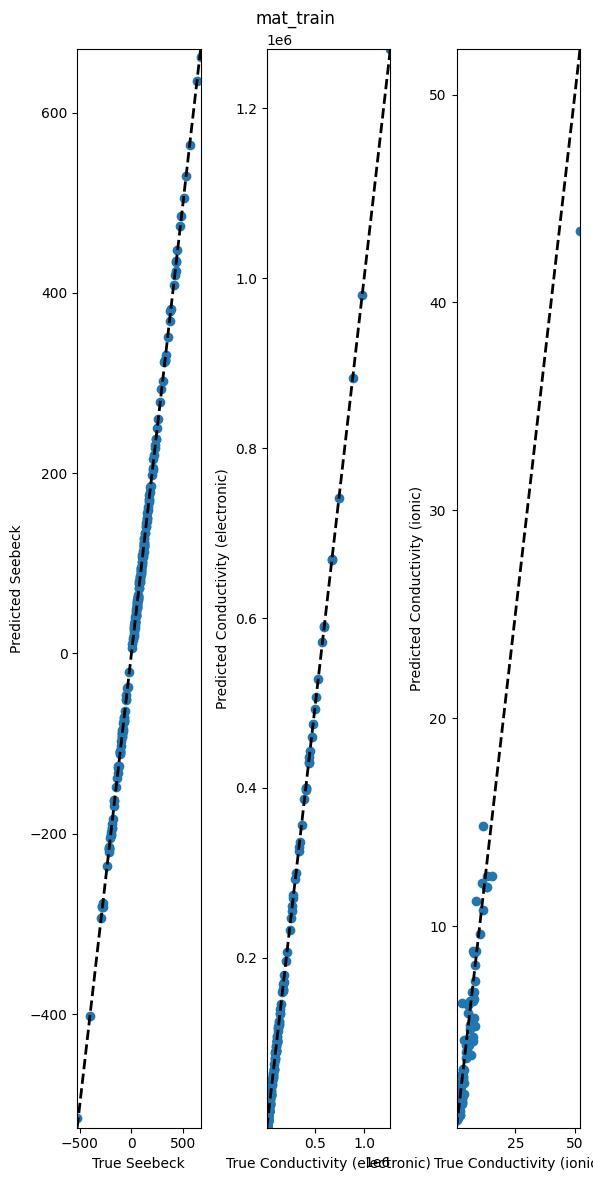

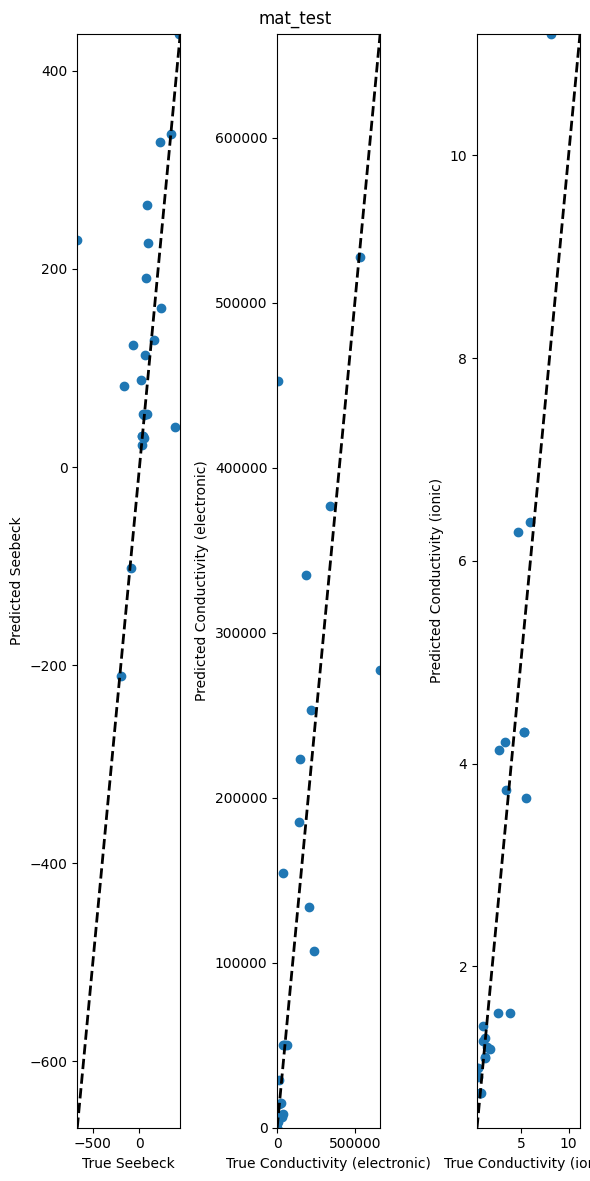

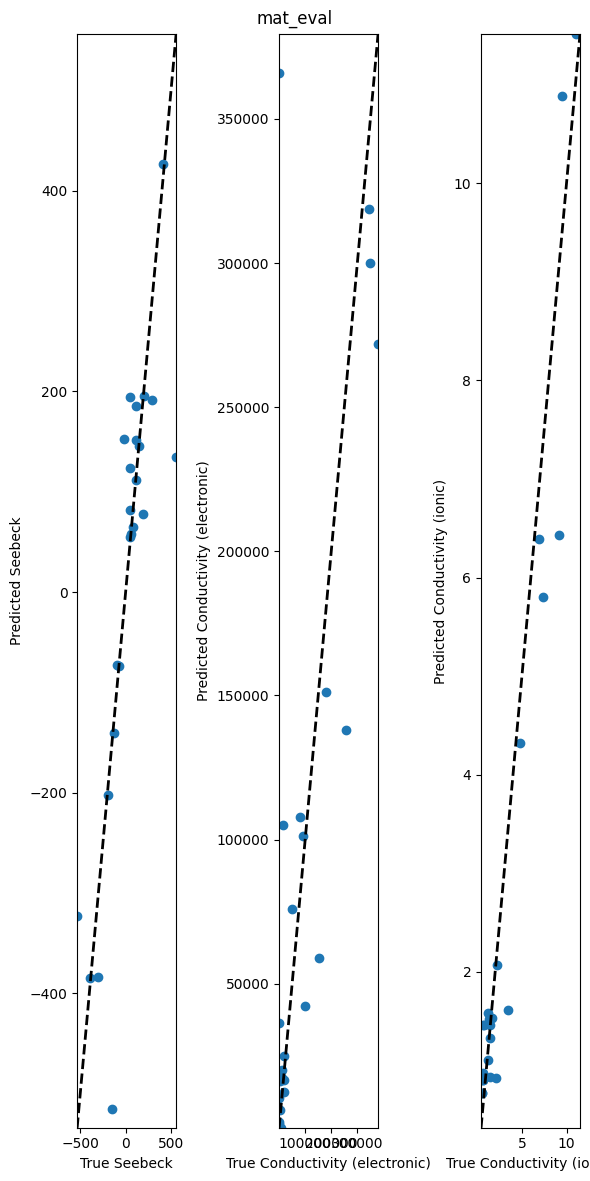

In [56]:
study.best_params
print("Best parameters:", study.best_params)

model = xgbr_trainer(study=study, model_name='mat', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, X_eval=X_eval, y_eval=y_eval)